In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (6,5)
AGENTS = ["B1","B2","B3","B4",
          "C1","C2","C3","C4",
          "D1","D2","D3","D4",
          "E1","E2","E3","E4"]   # any 16-agent ordering you used


In [2]:
path = "ckpt/block_normal/Ours_Attention/400_attn_per_episode.npy"
A = np.load(path)           # shape (E,16,16)
print(f"Loaded {A.shape[0]} episodes   matrix size {A.shape[1:]}")

# quick sanity-check: rows sum to 1 ?
print( np.round(A[0].sum(-1), 3) )     # should all be 1.000


Loaded 1 episodes   matrix size (16, 16)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


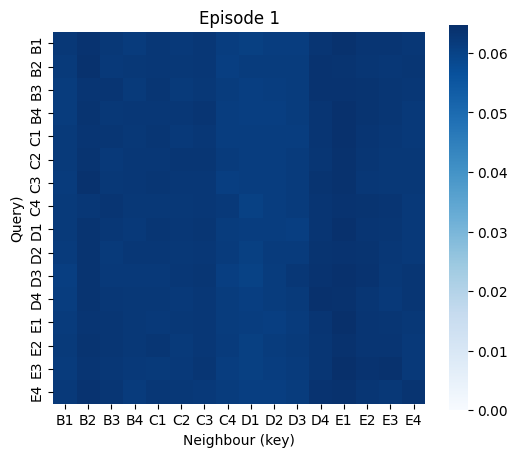

In [3]:
def show_heat(ep=0, cmap="Blues"):
    sns.heatmap(A[ep], vmax=A.max(), vmin=0,
                xticklabels=AGENTS, yticklabels=AGENTS,
                cmap=cmap, square=True, cbar=True)
    plt.title(f"Episode {ep+1}")
    plt.ylabel("Query)"); plt.xlabel("Neighbour (key)")
    plt.show()

show_heat(0)     # first episode


[[0.06257722 0.06380962 0.06247317 0.06184701 0.06285408 0.06235937
  0.06271046 0.06132526 0.06074999 0.06132513 0.06122583 0.06323925
  0.06403076 0.06329866 0.06331365 0.06286059]
 [0.06196046 0.06406823 0.06230949 0.06248784 0.06286277 0.06248811
  0.06284694 0.06086641 0.06138642 0.06137845 0.06138926 0.06373786
  0.06360683 0.06289419 0.06273416 0.06298262]
 [0.0615333  0.06334472 0.06330194 0.06209192 0.06292322 0.06211735
  0.06258145 0.0615254  0.06095374 0.06134819 0.06157174 0.06374501
  0.06387894 0.0634812  0.06292818 0.06267373]
 [0.0615545  0.06352335 0.06249075 0.06286763 0.06287195 0.06268431
  0.06335691 0.06124737 0.06097781 0.06089511 0.06139822 0.06336038
  0.06424338 0.06339626 0.06297344 0.06215863]
 [0.06196444 0.06336616 0.06291107 0.06256051 0.06305455 0.06227336
  0.06285113 0.06131136 0.06124319 0.06126053 0.06134323 0.06318072
  0.06422186 0.06335578 0.06275035 0.06235176]
 [0.06200892 0.06341163 0.06231974 0.0626936  0.06265218 0.06299861
  0.0629027  0.06

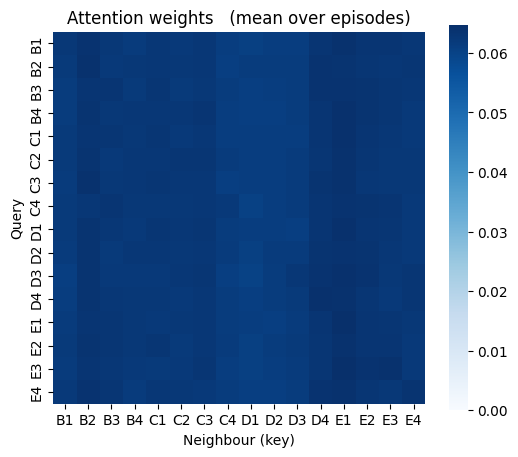

In [4]:
A_mean = A.mean(0)          # (16,16)
print(A_mean)
sns.heatmap(A_mean, vmax=A_mean.max(), vmin=0,
            xticklabels=AGENTS, yticklabels=AGENTS,
            cmap="Blues", square=True)
plt.title("Attention weights   (mean over episodes)")
plt.ylabel("Query"); plt.xlabel("Neighbour (key)")
plt.show()


In [5]:
k = 3
rows = []
for i,recv in enumerate(AGENTS):
    idx = np.argsort(A_mean[i])[::-1][:k]
    rows.append({"Agent":recv,
                 "Top-k": ", ".join([AGENTS[j] for j in idx]),
                 "Weights": ", ".join([f"{A_mean[i,j]:.2f}" for j in idx])})
pd.DataFrame(rows)


,Agent,Top-k,Weights
0,B1,"E1, B2, E3","0.06, 0.06, 0.06"
1,B2,"B2, D4, E1","0.06, 0.06, 0.06"
2,B3,"E1, D4, E2","0.06, 0.06, 0.06"
3,B4,"E1, B2, E2","0.06, 0.06, 0.06"
4,C1,"E1, B2, E2","0.06, 0.06, 0.06"
5,C2,"E1, B2, E2","0.06, 0.06, 0.06"
6,C3,"E1, B2, D4","0.06, 0.06, 0.06"
7,C4,"E1, E2, D4","0.06, 0.06, 0.06"
8,D1,"E1, B2, E2","0.06, 0.06, 0.06"
9,D2,"E1, E2, B2","0.06, 0.06, 0.06"


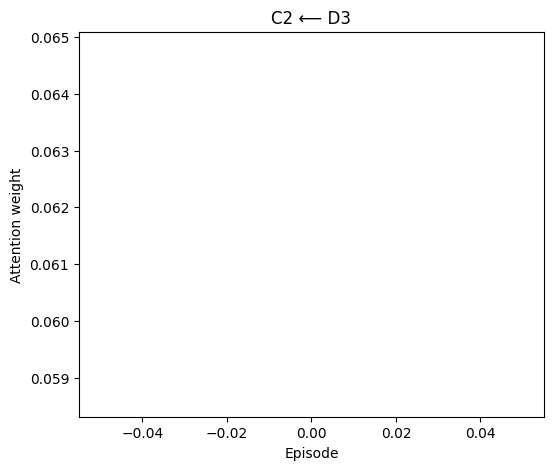

In [6]:
pair = ("C2","D3")        # receiver, neighbour
i, j = AGENTS.index(pair[0]), AGENTS.index(pair[1])

plt.plot(A[:, i, j])
plt.xlabel("Episode"); plt.ylabel("Attention weight")
plt.title(f"{pair[0]} ⟵ {pair[1]}")
plt.show()


In [7]:
def grid_heat(Amean, idx, ax=None, cmap="Blues"):
    """
    Amean : ndarray (16,16)
    idx   : int                
    """

    if ax is None:
        ax = plt.gca()

    # 1-D → 4×4 (column-major) → transpose → flip rows
    mat = Amean[idx].reshape(4, 4).T[::-1]      #   ←★ ONLY 1-LINE CHANGE

    sns.heatmap(mat,
                annot=True, fmt=".02f",
                cmap=cmap, square=True, cbar=False,
                xticklabels=["0","1","2","3"],
                yticklabels=["0","1","2","3"][::-1],
                ax=ax)
    ax.set_title(f"Agent {AGENTS[idx]}")
    ax.set_xlabel("col →")
    ax.set_ylabel("row ↑")



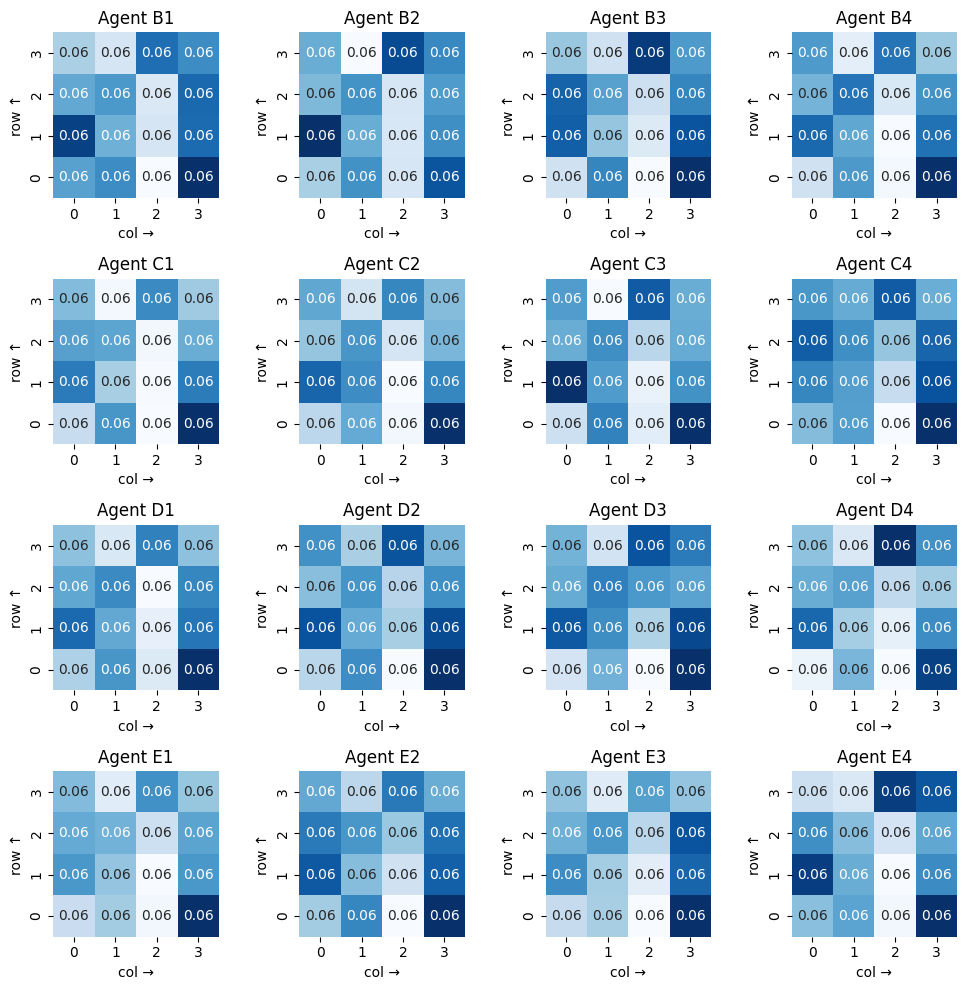

In [8]:
fig,axes = plt.subplots(4,4,figsize=(10,10))
for k,ax in enumerate(axes.ravel()):
    grid_heat(A_mean, k, ax=ax)
plt.tight_layout(); plt.show()


[0.0005]


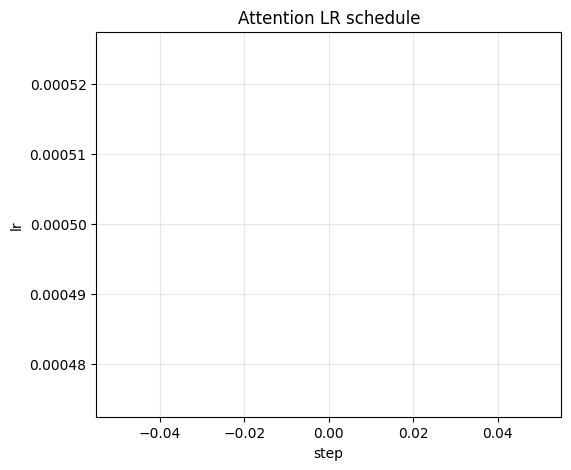

In [9]:
lrs = np.load("ckpt/block_normal/Ours_Attention/400_attn_lr_history.npy")
plt.plot(lrs)
plt.title("Attention LR schedule")
plt.xlabel("step"); plt.ylabel("lr")
plt.grid(alpha=.3)
print(lrs)
